# DD2437 Lab 3, Hopfield networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data
x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])

In [3]:
def sign(x):
    return np.where(x < 0, -1, 1)

In [4]:
def calc_weights(pattern, normalize=False):
    if normalize:
        return pattern.T.dot(pattern)/pattern.shape[1]
    return pattern.T.dot(pattern)

In [5]:
def update_rule(pattern, weights):
    return sign(pattern.dot(weights))

In [6]:
pattern = np.c_[x1, x2, x3].T
weights = calc_weights(pattern)
(update_rule(pattern, weights) == pattern).all()

True

Make sure that the above says true, this means we've initialized the hopfield network to maintain our x-input as fixed points. Not modifying them in the update step.

## 3.1 Convergence and attractors

In [73]:
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])
patterns_mod = np.c_[x1d, x2d, x3d].T

In [74]:
def update_til_converge(pattern, weights, return_iterations=False):
    updated = pattern
    prev = np.zeros(pattern.shape)
    iterations = 0
    while not (updated == prev).all():
        prev = updated
        updated = update_rule(prev, weights)
        iterations += 1

    if return_iterations:
        return updated, iterations
    
    return updated

In [75]:
updated = update_til_converge(patterns_mod, weights)

In [76]:
updated == pattern

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

x2d does not converge to the stored pattern, the other two do however.

In [77]:
def examine_states(weights):
    N = weights.shape[0]
    attractors = []
    for val in range(2**N):
        bin_val = format(val, '0{}b'.format(N))
        bin_list = np.array([int(b) for b in bin_val])
        input_val = np.where(bin_list == 1, 1, -1)
        attractors.append(update_til_converge(input_val, weights))
    return attractors

In [78]:
attractors = examine_states(weights)
attractors = [tuple(attractor) for attractor in attractors]

In [79]:
from collections import Counter
import operator

counts = dict(Counter(attractors))
# counts = sorted(counts.items(), key=operator.itemgetter(1))
# print(counts, len(counts))
for key, count in counts.items():
    if (np.array(key) == x1).all():
        print("x1: {}".format(count))
    elif (np.array(key) == x2).all():
        print("x2: {}".format(count))
    elif (np.array(key) == x3).all():
        print("x3: {}".format(count))
    else:
        print(key, count)

x2: 20
(-1, -1, 1, -1, -1, 1, -1, 1) 7
(-1, -1, 1, -1, 1, 1, -1, 1) 15
(-1, -1, -1, -1, 1, -1, -1, -1) 1
x1: 20
(1, -1, -1, 1, 1, -1, 1, -1) 32
(1, 1, -1, 1, -1, 1, 1, -1) 36
(1, 1, 1, 1, 1, -1, 1, 1) 57
x3: 42
(-1, 1, -1, -1, -1, 1, -1, -1) 4
(1, 1, -1, 1, 1, -1, 1, -1) 12
(-1, 1, 1, -1, 1, -1, -1, 1) 4
(1, 1, 1, 1, -1, 1, 1, 1) 4
(1, 1, -1, 1, 1, 1, 1, -1) 2


In [80]:
def examine_distant_states(weights):
    N = weights.shape[0]
    convergence_times = {}
    for val in range(2**N):
        bin_val = format(val, '0{}b'.format(N))
        bin_list = np.array([int(b) for b in bin_val])
        input_val = np.where(bin_list == 1, 1, -1)
        val, iterations = update_til_converge(input_val, weights, return_iterations=True)
        convergence_times[bin_val] = iterations
    return convergence_times

In [81]:
def get_min_dist(bin_val, baselines):
    bin_list = np.array([int(b) for b in bin_val])
    pattern = np.where(bin_list == 1, 1, -1)
    min_dist = pattern.shape[0]
    
    for baseline in baselines:
        min_dist = min(min_dist, list(pattern == baseline).count(False))
    return min_dist

In [83]:
convergence_times = examine_distant_states(weights)
for val, iterations in convergence_times.items():
    min_dist = get_min_dist(val, [x1, x2, x3])
    if min_dist >= x1.shape[0]/2:
        print(min_dist, iterations)

SyntaxError: unexpected EOF while parsing (<ipython-input-83-9228717cc90c>, line 5)

In [136]:
def get_pict_data():
    filename = "pict.dat"
    pictsdata = []
    with open(filename) as f:
        pictsdata = [int(p_val) for p_val in f.read().split(',')]
    return pictsdata

In [137]:
PICT_DIM = 1024
NO_PICTS = 9
picts_raw = get_pict_data()
picts = []
for ndx in range(NO_PICTS):
    picts.append(picts_raw[PICT_DIM*ndx : PICT_DIM*(ndx+1)])

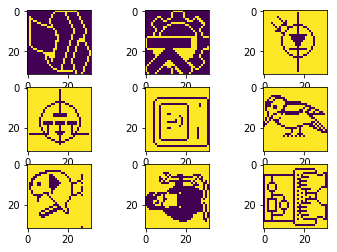

In [158]:

fig = plt.figure()
for ndx, pict in enumerate(picts):
    fig.add_subplot(3, 3, ndx+1)
    imagedata = np.where(np.array(pict) == 1, 1, 0).reshape(32,32)
    plt.imshow(imagedata)